# Try out for lab

In [12]:
# db = MySQLdb.connect("http://dolgi.informatik.rwth-aachen.de:3306","ldavlab_ruiming","bt8VTsGH7tsXt3BS","Lab_Visual" )
import MySQLdb
import numpy as np

# Connect with the MySQL Server
db = MySQLdb.connect(host='dolgi.informatik.rwth-aachen.de', port = 3306, user='ldavlab_ruiming',passwd='bt8VTsGH7tsXt3BS', db='ldavlab')


# prepare a cursor object using cursor() method
cursor = db.cursor()

# execute SQL query using execute() method.
cursor.execute("SELECT Bewertung, SpentTime/60  FROM    ldavlab_ruiming.etesttries_view where     etestnr = '1' and Status = 'Beendet' and SpentTime < 6000 group by Nachname")

# Fetch a single row using fetchone() method.
data = cursor.fetchall()

from sklearn import preprocessing
X = np.array(data)
data = preprocessing.scale(X)
# print (data)

db.close()

In [13]:
import pandas as pd
df = pd.DataFrame( [[ij for ij in i] for i in data] )
df.rename(columns={0: 'Grade', 1: 'Time'}, inplace=True);

In [14]:
df.head()

,Grade,Time
0,0.056812,-0.161181
1,-1.059977,-0.283062
2,0.087270,-0.759394
3,-0.125935,-0.408290
4,0.087270,2.298752


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
        Grade      Time
0    0.056812 -0.161181
1   -1.059977 -0.283062
2    0.087270 -0.759394
3   -0.125935 -0.408290
4    0.087270  2.298752
5    1.112686  0.300612
6   -2.120927 -0.692305
7    0.935015 -0.412765
8   -0.364522 -0.573779
9    0.148186 -0.634159
10  -0.278224 -0.259581
11   0.874099  0.066921
12   1.295434 -0.571545
13  -0.699559  0.245827
14  -0.125935 -0.725850
15  -0.034561 -0.536880
16  -0.156393 -0.761628
17   1.112686  1.822420
18   0.691352  0.341986
19   1.112686 -0.646457
20   1.295434 -0.833192
21  -0.364522  3.971502
22  -0.669101 -0.012465
23   1.295434 -0.554773
24   1.295434 -0.797407
25  -2.389972  0.251416
26   0.478147  1.144820
27   0.691352  0.254770
28   0.447689  0.000953
29  -2.450888 -0.418354
..        ...       ...
90   0.660894 -0.116453
91   0.508605 -0.486563
92  -0.278224 -0.290885
93   0.691352 -0.028124
94   0.874099 -0.673292
95  -0.938146  5.820925
96  -0.455895 

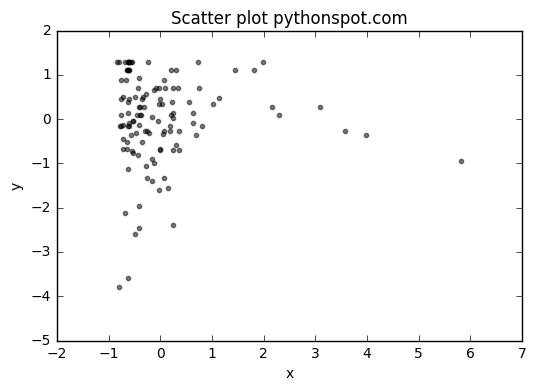

In [15]:
import numpy as np
import matplotlib.pyplot as plt
 
# Create data
x = df['Time']
y = df['Grade']

print(type(x))
print(type(df))
print(df)

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
from scipy import cluster

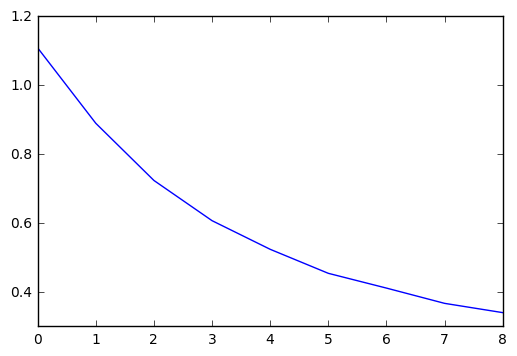

In [17]:
initial = [cluster.vq.kmeans(data,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.show()

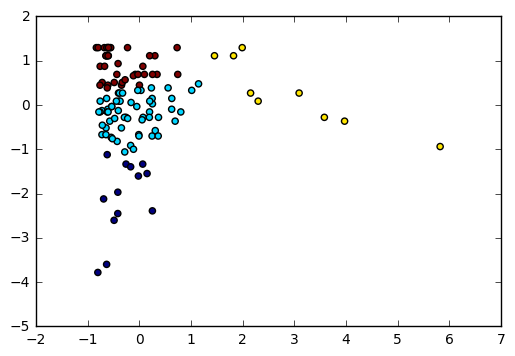

<class 'numpy.ndarray'>


In [18]:
cent, var = initial[3]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(data,cent)
plt.scatter(x, y, c=assignment)
plt.show()

print(type(assignment))

In [19]:
df = df.assign(Class=pd.Series(assignment).values)

In [20]:
dn = pd.DataFrame( [[ij for ij in i] for i in X] )
dn = dn.assign(Class=pd.Series(assignment).values)
print(dn)

         0         1  Class
0     7.56   10.9500      1
1     5.36    9.1333      1
2     7.62    2.0333      1
3     7.20    7.2667      1
4     7.62   47.6167      2
5     9.64   17.8333      3
6     3.27    3.0333      0
7     9.29    7.2000      3
8     6.73    4.8000      1
9     7.74    3.9000      1
10    6.90    9.4833      1
11    9.17   14.3500      3
12   10.00    4.8333      3
13    6.07   17.0167      1
14    7.20    2.5333      1
15    7.38    5.3500      1
16    7.14    2.0000      1
17    9.64   40.5167      2
18    8.81   18.4500      3
19    9.64    3.7167      3
20   10.00    0.9333      3
21    6.73   72.5500      2
22    6.13   13.1667      1
23   10.00    5.0833      3
24   10.00    1.4667      3
25    2.74   17.1000      0
26    8.39   30.4167      1
27    8.81   17.1500      3
28    8.33   13.3667      3
29    2.62    7.1167      0
..     ...       ...    ...
90    8.75   11.6167      3
91    8.45    6.1000      3
92    6.90    9.0167      1
93    8.81   12.9333

Now is the time for dealing with courses


In [15]:
import pickle
lv2name = pickle.load( open( "lv2name.p", "rb" ) )

In [29]:
lv2name

{10223617: 'Quantitative Umweltgeochemie(VÜ)',
 10223619: 'Infinite Games(V)',
 15204356: 'GK 1+2.c Italienisch(SK)',
 10223626: 'Reaktorsicherheit(V)',
 10223630: 'Proseminar C: Modernism',
 15204368: 'Anwendungen der Lasertechnik(V)',
 15204369: '04369-Strukturentwurf f³r Luft- und Ra..(V)',
 13107218: '07218-Praktikum Allgemeine und Analyti..(P)',
 15204371: 'Angewandte Wõrmetechnik(Ü)',
 17200575: '00575-Seminar Sprachwissenschaft Franz..(S)',
 13238297: '38297-Sensortechnik und Datenverarbeit..(V)',
 13238298: 'Pr³fung Messtechnik und Qualitõt(Kl)',
 13238299: '38299-Klausur Qualifikationsprofil Mol..(Kl)',
 10223645: "23645-Exercices d'expression orale IV:..(Ü)",
 13107234: 'OK Business Matters 1.b(SK)',
 15204390: '04390-Projektstudie Baubetrieb und Pro..(Ü)',
 10223655: '23655-Das Handwerk des Historikers erl..(PS)',
 10223656: '23656-Zentrum familiõrer Hõuslichkeit ..(HS)',
 16143708: '43708-Planungsseminar Aufbereitungsanl..(S)',
 10223658: '23658-Die Alltagskultur der Weimar

In [30]:
type(lv2name)

dict

In [31]:
# import re
# pattern = re.compile("^[0-9]{5}\-")
# t = pattern.match('90009-fewofnoo2 23rfdf -2 ]d')
# if t:
#     print('hea')

In [32]:
# t =re.match('hello[0-9]+', 'hello1')
# if pattern.search('90909-fewofnoo2 23rfdf -2 ]d'):
#     print('matched')

In [33]:
import re
pattern = re.compile("^[0-9]{5}\-")
for index, value in lv2name.items():
    if pattern.match(value):
        continue
    else:
        tempstr = str(index)
        lv2name[index] = tempstr[3:] + '-' + value

In [34]:
lv2name

{10223617: '23617-Quantitative Umweltgeochemie(VÜ)',
 10223619: '23619-Infinite Games(V)',
 15204356: '04356-GK 1+2.c Italienisch(SK)',
 10223626: '23626-Reaktorsicherheit(V)',
 10223630: '23630-Proseminar C: Modernism',
 15204368: '04368-Anwendungen der Lasertechnik(V)',
 15204369: '04369-Strukturentwurf f³r Luft- und Ra..(V)',
 13107218: '07218-Praktikum Allgemeine und Analyti..(P)',
 15204371: '04371-Angewandte Wõrmetechnik(Ü)',
 17200575: '00575-Seminar Sprachwissenschaft Franz..(S)',
 13238297: '38297-Sensortechnik und Datenverarbeit..(V)',
 13238298: '38298-Pr³fung Messtechnik und Qualitõt(Kl)',
 13238299: '38299-Klausur Qualifikationsprofil Mol..(Kl)',
 10223645: "23645-Exercices d'expression orale IV:..(Ü)",
 13107234: '07234-OK Business Matters 1.b(SK)',
 15204390: '04390-Projektstudie Baubetrieb und Pro..(Ü)',
 10223655: '23655-Das Handwerk des Historikers erl..(PS)',
 10223656: '23656-Zentrum familiõrer Hõuslichkeit ..(HS)',
 16143708: '43708-Planungsseminar Aufbereitungsanl

In [35]:
import pickle

pickle.dump( lv2name, open( "lv2name.p", "wb" ) )

In [22]:
import pickle
copyofdata = pickle.load( open( "coursetable_jan.p", "rb" ) )

In [23]:
copyofdata

{'02ce0263': ['16106285'],
 '863db987': ['16151239', '16100937'],
 '59cc8b51': ['16102678'],
 'b2c88eca': ['16145552', '16147017', '16134355'],
 '863d0286': ['16105151'],
 '574e2ab1': ['16128859', '16206862', '16236509', '13200396'],
 '5900d28a': ['16105044', '11102568', '16102568'],
 '4db63e7d': ['16105458'],
 '50bb62f9': ['15217462', '16203896'],
 '86826aa4': ['16112450'],
 '863d2833': ['16100135', '16146933', '16134342', '16106015'],
 '584ddd76': ['16146480'],
 '55c500c2': ['16103888', '16124679'],
 '5dee901c': ['16104974'],
 '584d1c4e': ['16132205'],
 '863dbe3a': ['16134522', '16100095'],
 '54b0afef': ['16129575'],
 '5edd12c7': ['16118172'],
 '54b442a7': ['16100856', '16137850'],
 '579521e2': ['16229171'],
 '542ce4db': ['16102931'],
 '863dba40': ['13220968',
  '16220968',
  '16105123',
  '16100868',
  '16100676',
  '16106285',
  '16102859'],
 '863d97b1': ['16219269', '16138123'],
 '8682b6b8': ['16108468', '16106039'],
 '584d6b66': ['16103135'],
 '89e2984f': ['14104035'],
 '5b398ac3

In [24]:
listforfp = list(copyofdata.values())
dictsort = {}
for courses in listforfp:
    for cornum in courses:
        if cornum in dictsort:
            dictsort[cornum]+=1
        else:
            dictsort[cornum] = 1

import operator

sorted_dict = sorted(dictsort.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict = sorted_dict[0:60]

In [25]:
sorted_dict

[('16110387', 7662),
 ('16137850', 7285),
 ('16106285', 5827),
 ('16112450', 5739),
 ('16103724', 5738),
 ('16104543', 5329),
 ('16104974', 5017),
 ('16100722', 4368),
 ('16119858', 4200),
 ('16105171', 4125),
 ('16104035', 4021),
 ('16101188', 3812),
 ('16104317', 3615),
 ('16102656', 3509),
 ('16100748', 3488),
 ('16102931', 3326),
 ('16104689', 3207),
 ('16106039', 3184),
 ('16100856', 3103),
 ('16100997', 2997),
 ('16102015', 2953),
 ('16108468', 2856),
 ('16101994', 2613),
 ('16105179', 2417),
 ('16108364', 2336),
 ('16102568', 2300),
 ('16102517', 2257),
 ('16100217', 2164),
 ('16103487', 2137),
 ('16112227', 2047),
 ('16118808', 2042),
 ('16102859', 1959),
 ('16100538', 1792),
 ('16151239', 1739),
 ('16102678', 1737),
 ('16112136', 1691),
 ('16102079', 1681),
 ('16145297', 1679),
 ('16105586', 1637),
 ('16151407', 1629),
 ('16106014', 1622),
 ('16139454', 1615),
 ('16103462', 1598),
 ('16104603', 1595),
 ('16115682', 1561),
 ('16123156', 1516),
 ('16120340', 1516),
 ('16109905',

In [26]:
# def reconstruct(line):
#     s = list(line)
#     if s[2] == '1':
#         s[2] = "ws-"
#     else:
#         s[2] = "ss-"

#     line =  "".join(s)
#     return line

In [27]:
# import re
# from collections import Counter
# import pickle

# WORDS = pickle.load( open( "germanwords.p", "rb" ) )

# def P(word, N=sum(WORDS.values())): 
#     "Probability of `word`."
#     return WORDS[word] / N

# def candidates(word): 
#     "Generate possible spelling corrections for word."
#     return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# def known(words): 
#     "The subset of `words` that appear in the dictionary of WORDS."
#     return set(w for w in words if w in WORDS)

# def edits1(word):
#     "All edits that are one edit away from `word`."
#     letters    = 'öäüÖÄÜßáóúéÁÓÚÉ'
#     splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
#     replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
#     return set(replaces)

# def edits2(word): 
#     "All edits that are two edits away from `word`."
#     return (e2 for e1 in edits1(word) for e2 in edits1(e1))

# def correctionWord(word): 
#     "Most probable spelling correction for word."
#     return max(candidates(word.lower()), key=P)

# def correctionStr(string):
#     "Correction for a string with multiple words"
# #     trimstr = re.sub("\s*\(.*\)\s*", "", string)
# #     strarray = re.findall(r'[A-Z\?]?[a-z\?]+', string)
#     strarray = re.findall(r'[A-Za-z0-9\?]+', string)

#     for i, substring in enumerate(strarray):
#         if "?" in substring:
#             strarray[i] = correctionWord(substring)
#     resultstr = " ".join(x for x in strarray)        
#     return resultstr

In [28]:
t = 1
t

1

In [29]:
# import MySQLdb
# import MySQLdb.cursors
# jsondata = []

# db = MySQLdb.connect(host='dolgi.informatik.rwth-aachen.de', port = 3306, user='ldavlab_ruiming',passwd='bt8VTsGH7tsXt3BS', db='ldavlab', cursorclass = MySQLdb.cursors.SSCursor)
# cursor = db.cursor()

# for item, value in sorted_dict:
#     string = reconstruct(item)
#     query = "SELECT CRTitle FROM ldavlab.courseRooms where LVNumber = '" + string + "' limit 1"
#     cursor.execute(query)
#     result = cursor.fetchone()
#     if result is None:
#         print(string)
#         continue
    
#     jsondata.append({"name":correctionStr(result[0]), "value":value})
    


# cursor.close()
# db.close()



    

In [30]:
def toNumber(str):
    return str.replace('ws-','1').replace('ss-','2')

In [31]:
toNumber('fewfess-fefwe')

'fewfe2fefwe'

In [32]:
jsondata = [{"name":lv2name[int(index)], "value":value} for index, value in sorted_dict if int(index) in lv2name]

# for index, value in sorted_dict:
#     jsondata.append({"name":lv2name[int(index)], "value":value})

In [33]:
jsondata

[{'name': '10387-Internes Rechnungswesen und buch..(VÜ)', 'value': 7662},
 {'name': '37850-höhere Mathematik I für Wirtscha..(V)', 'value': 7285},
 {'name': '06285-Investition und Finanzierung auß..(V)', 'value': 5827},
 {'name': '12450-Werkstoffkunde I(V)', 'value': 5739},
 {'name': '03724-Thermodynamik II(V)', 'value': 5738},
 {'name': '04543-Mechanik I für Maschinenbauer(V)', 'value': 5329},
 {'name': '04974-Produktion und Logistik(V)', 'value': 5017},
 {'name': '00722-Grundgebiete der Elektrotechnik ..(V)', 'value': 4368},
 {'name': '19858-wärme und stoffübertragung I(Ü)', 'value': 4200},
 {'name': '05171-Mathematik III(V)', 'value': 4125},
 {'name': '04035-Analysis für Informatiker(V)', 'value': 4021},
 {'name': '01188-Maschinengestaltung I für Maschi..(V)', 'value': 3812},
 {'name': '04317-Regelungstechnik Vorlesung(V)', 'value': 3615},
 {'name': '02656-Mathematik I(V)', 'value': 3509},
 {'name': '00748-grundzüge der Chemie(V)', 'value': 3488},
 {'name': '02931-höhere Mathematik 

In [34]:
len(jsondata)

58

In [35]:
jsondata = jsondata[:58]

In [36]:
jsondata

[{'name': '10387-Internes Rechnungswesen und buch..(VÜ)', 'value': 7662},
 {'name': '37850-höhere Mathematik I für Wirtscha..(V)', 'value': 7285},
 {'name': '06285-Investition und Finanzierung auß..(V)', 'value': 5827},
 {'name': '12450-Werkstoffkunde I(V)', 'value': 5739},
 {'name': '03724-Thermodynamik II(V)', 'value': 5738},
 {'name': '04543-Mechanik I für Maschinenbauer(V)', 'value': 5329},
 {'name': '04974-Produktion und Logistik(V)', 'value': 5017},
 {'name': '00722-Grundgebiete der Elektrotechnik ..(V)', 'value': 4368},
 {'name': '19858-wärme und stoffübertragung I(Ü)', 'value': 4200},
 {'name': '05171-Mathematik III(V)', 'value': 4125},
 {'name': '04035-Analysis für Informatiker(V)', 'value': 4021},
 {'name': '01188-Maschinengestaltung I für Maschi..(V)', 'value': 3812},
 {'name': '04317-Regelungstechnik Vorlesung(V)', 'value': 3615},
 {'name': '02656-Mathematik I(V)', 'value': 3509},
 {'name': '00748-grundzüge der Chemie(V)', 'value': 3488},
 {'name': '02931-höhere Mathematik 

In [37]:
import json
with open('wordcloud_jan.json', 'w',encoding='utf8') as outfile:
    json.dump(jsondata, outfile)

In [3]:
import MySQLdb
import MySQLdb.cursors
import time, sys



# Connect with the MySQL Server
db = MySQLdb.connect(host='dolgi.informatik.rwth-aachen.de', port = 3306, user='ldavlab_ruiming',passwd='bt8VTsGH7tsXt3BS', db='ldavlab', cursorclass = MySQLdb.cursors.SSCursor)


# prepare a cursor object using cursor() method
cursor = db.cursor()

query = "SELECT distinct * FROM  ldavlab_ruiming.wordcloud_jan_view"
cursor.execute(query)
# print (cursor.rowcount)

datadict = {}
count = 0

for row in cursor:
# for i in tnrange(50000, desc='1st loop'): 
#     row = cursor.fetchone()
    count += 1
    if row[0] in datadict:
#         if row[1] not in datadict[row[0]]:
        datadict[row[0]].append(row[1])
    else:
        datadict[row[0]]=[row[1]]

cursor.close()
db.close()

print(count)

429590


In [52]:
datadict

{'b2f9c2d7': ['16105171',
  '16104317',
  '16104673',
  '16100217',
  '16118808',
  '16112450',
  '16119858',
  '16102468',
  '16102836',
  '16105725',
  '16102678',
  '16102122',
  '16102664',
  '16103911',
  '16103760'],
 'bc7eacb0': ['16101049', '16106554'],
 '4e30975b': ['16102468', '16104543', '16102531', '16102129'],
 '542c8f90': ['16133881'],
 '863d8da9': ['16202322'],
 '02f7f2cd': ['16100676', '14203654', '16112450'],
 '4ffcd891': ['16104381'],
 '863d6d6a': ['16105868'],
 '55c514b7': ['16229470'],
 '50bb6316': ['16105571'],
 '5ccc70c3': ['16102971', '16102088'],
 '5899f2ca': ['16139020', '16204213'],
 '4ff1044f': ['16102517'],
 '55cb1634': ['16202404',
  '16131020',
  '16200317',
  '16112830',
  '15200317',
  '16128394'],
 '5cdff890': ['16102374'],
 '549bf29c': ['16104543'],
 '5ccd49f1': ['16128859'],
 '863d546c': ['16124003', '16102079', '16120340'],
 '863db821': ['16223102', '16134277', '16103462'],
 'd4b2d813': ['16100722'],
 '863d80bf': ['16103724'],
 '5d8100fc': ['16100319

In [4]:
import pickle

pickle.dump( datadict, open( "coursetable_jan2nd.p", "wb" ) )

In [54]:
datadict

{'b2f9c2d7': ['16105171',
  '16104317',
  '16104673',
  '16100217',
  '16118808',
  '16112450',
  '16119858',
  '16102468',
  '16102836',
  '16105725',
  '16102678',
  '16102122',
  '16102664',
  '16103911',
  '16103760'],
 'bc7eacb0': ['16101049', '16106554'],
 '4e30975b': ['16102468', '16104543', '16102531', '16102129'],
 '542c8f90': ['16133881'],
 '863d8da9': ['16202322'],
 '02f7f2cd': ['16100676', '14203654', '16112450'],
 '4ffcd891': ['16104381'],
 '863d6d6a': ['16105868'],
 '55c514b7': ['16229470'],
 '50bb6316': ['16105571'],
 '5ccc70c3': ['16102971', '16102088'],
 '5899f2ca': ['16139020', '16204213'],
 '4ff1044f': ['16102517'],
 '55cb1634': ['16202404',
  '16131020',
  '16200317',
  '16112830',
  '15200317',
  '16128394'],
 '5cdff890': ['16102374'],
 '549bf29c': ['16104543'],
 '5ccd49f1': ['16128859'],
 '863d546c': ['16124003', '16102079', '16120340'],
 '863db821': ['16223102', '16134277', '16103462'],
 'd4b2d813': ['16100722'],
 '863d80bf': ['16103724'],
 '5d8100fc': ['16100319